In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('C:/Users/AMAN/Downloads/weatherHistory.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
df.dropna(inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [57]:
for i in df.index:
    if df.loc[i,'Pressure (millibars)']<1020:
        df.loc[i,'Pressure (millibars)']=df['Pressure (millibars)'].mean()
df.dropna(inplace=True)

In [58]:
df[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']].corr()

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,-0.632224,0.008659,-0.370373
Humidity,-0.632224,1.000000,-0.224697,0.121227
Wind Speed (km/h),0.008659,-0.224697,1.000000,-0.152579
Pressure (millibars),-0.370373,0.121227,-0.152579,1.000000


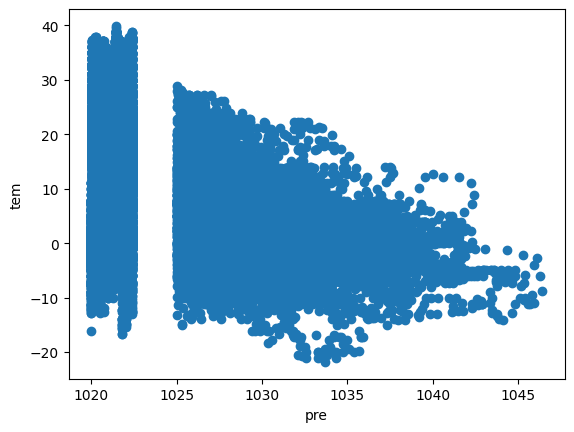

In [59]:
plt.plot(df['Pressure (millibars)'],df['Temperature (C)'],'o')
plt.xlabel("pre")
plt.ylabel("tem")
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [61]:
x=df[['Humidity','Wind Speed (km/h)','Pressure (millibars)']]
y=df['Temperature (C)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.5191674801940347


In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
x=df[['Humidity','Wind Speed (km/h)','Pressure (millibars)']]
y=df['Temperature (C)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=RandomForestRegressor()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.8465455104427584


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 2.6165642453446423
MSE: 13.998821373509807
R2 Score: 0.8465455104427584


In [66]:
import joblib
joblib.dump(model, "New_weather_model.pkl")

['New_weather_model.pkl']